<a href="https://colab.research.google.com/github/ManisMalakar/Convolutional-Neural-Network-/blob/main/Binary_Image_Classification_for_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import tensorflow as tf
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
#Installing Kaggle API
!pip install -q Kaggle

In [59]:
#Creating a directory as directory
!mkdir -p ~/.kaggle

In [60]:
#Importing API key to Google Collab
from google.colab import files
uploaded=files.upload()

Saving kaggle.json to kaggle (1).json


In [61]:
#Copying API key to kaggle directory
!cp kaggle.json ~/.kaggle/

In [62]:
#Disabling API key
!chmod 600 /root/.kaggle/kaggle.json

In [63]:
#Importing the dataset
!kaggle datasets download -d tongpython/cat-and-dog

cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [64]:
#Creating an object(Initializing CNN)
model=tf.keras.models.Sequential()

In [65]:
#Adding first CNN Layer(Input Layer)
#1. Number of filters=64
#2. Kernel Size=3
#3. Padding=Same
#4. Activation= Relu
#5. Input Shape=(32,32,3)

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[32,32,3]))

In [66]:
#Adding MaxPool Layer
#1. Pool Size=2
#2. Strides=2
#3. Padding= Valid

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

In [67]:
#Adding second CNN layer and second Maxpool Layer
#1. Number of filters=64
#2. Kernel Size=3
#3. Padding=Same
#4. Activation= Relu


model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))

#Adding MaxPool Layer
#1. Pool Size=2
#2. Strides=2
#3. Padding= Valid

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

In [68]:
#Adding Flattening Layer
model.add(tf.keras.layers.Flatten())

In [69]:
#Adding the Dropout Layer
model.add(tf.keras.layers.Dropout(0.4))

In [70]:
#Adding fully connected layer
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [71]:
#Adding Output Layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [72]:
#Compiling the layer
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [73]:
#Fitting CNN To Images

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [80]:
training_data_dir = '/content/training_set/training_set'
test_data_dir = '/content/test_set/test_set'

In [81]:
#Rescaling the images

datagen=ImageDataGenerator(rescale=1./255)

In [82]:
training_set = datagen.flow_from_directory(directory=training_data_dir, target_size=(32, 32), classes=['dogs', 'cats'],
                                           class_mode = 'binary', batch_size = 20)

test_set = datagen.flow_from_directory(directory=test_data_dir, target_size=(32, 32), classes=['dogs', 'cats'],
                                           class_mode = 'binary', batch_size = 20)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [83]:
len(training_set), len(test_set)

(401, 102)

In [85]:
len(training_set) *20, len(test_set)*20

(8020, 2040)

In [86]:
test_set.batch_size

20

In [89]:
history = model.fit_generator(generator=training_set, steps_per_epoch=401, epochs=20, validation_data=test_set, validation_steps=102)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
401/401 [==============================] - 52s 129ms/step - loss: 0.5595 - accuracy: 0.7059 - val_loss: 0.5763 - val_accuracy: 0.7168
Epoch 2/20
401/401 [==============================] - 51s 128ms/step - loss: 0.5159 - accuracy: 0.7408 - val_loss: 0.5288 - val_accuracy: 0.7410
Epoch 3/20
401/401 [==============================] - 52s 130ms/step - loss: 0.4929 - accuracy: 0.7598 - val_loss: 0.5098 - val_accuracy: 0.7430
Epoch 4/20
401/401 [==============================] - 55s 137ms/step - loss: 0.4705 - accuracy: 0.7776 - val_loss: 0.5220 - val_accuracy: 0.7390
Epoch 5/20
401/401 [==============================] - 53s 131ms/step - loss: 0.4383 - accuracy: 0.7994 - val_loss: 0.4964 - val_accuracy: 0.7687
Epoch 6/20
401/401 [==============================] - 52s 129ms/step - loss: 0.4050 - accuracy: 0.8084 - val_loss: 0.5016 - val_accuracy: 0.7578
Epoch 7/20
401/401 [==============================] - 52s 130ms/step - loss: 0.3785 - accuracy: 0.8241 - val_loss: 0.4906 - val_ac

In [90]:
def learning_curve(history,epoch):
  #Training vs validation Accuracy
  epoch_range=range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Value'],loc='upper left')
  plt.show()

  #Training vs validation loss
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Value'],loc='upper left')
  plt.show()

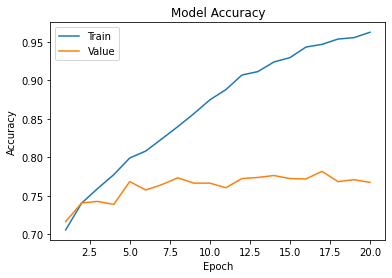

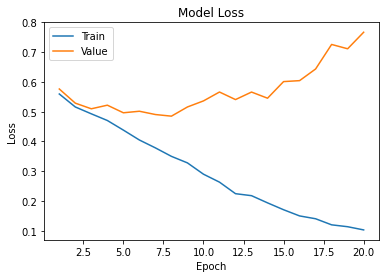

In [91]:
learning_curve(history,20)